Download the data

In [ ]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2023-07-28 06:16:20--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2023-07-28 06:16:20--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3e1569ce208399da7a4df3e126.dl.dropboxusercontent.com/cd/0/inline/CAsgk3zthUBUECWb4Xs5zSSXLAwhltwMnBjayirUp0EyA01FPR7KQ7nWks8CVX4MUOtrgcY3PDi5jOmlHg9e6DtHN5HGktLWuscq1ocWl2E_8wHrFG8jmcRlPOKowsmS1V7-vYwVMgmbaOKN0a1bT55H/file# [following]
--2023-07-28 06:16:20--  https://uc3e1569ce208399da7a4df3e126.dl.dropboxusercontent.com/cd/0/inline/CAsgk3zthUBUECWb4Xs5zSSXLAwhltwMnBjayirUp0EyA01FPR7KQ7nWks8CVX4MUOtrgcY3PDi5jOmlHg9e6Dt

Unzip the data

In [ ]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

- Load the images and verify the shapes
- Explore a few images
- Declare a model: Sequential
- Specify layers: Conv2d, Max Pooling, Dense, Dropout
- Compile the layers: Optimizer, Loss, Metrics - Accuracy
- Fit the model: x, y, validation, epochs, batch size
- Checkpointing

Populating the interactive namespace from numpy and matplotlib


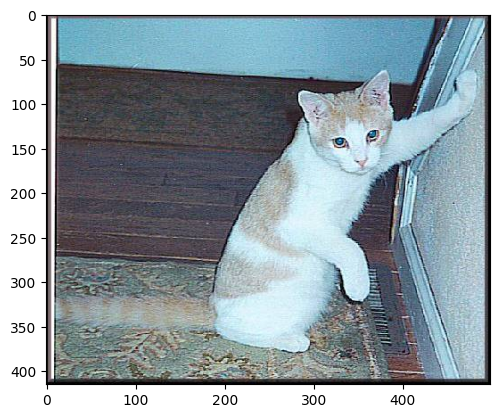

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/test_set/test_set/cats/cat.4001.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
img.shape

(415, 498, 3)

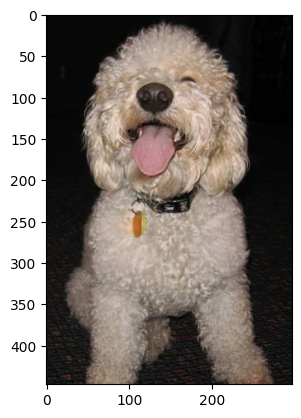

In [ ]:
img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


Load all relevant libraries

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, GlobalMaxPooling2D
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
img_width, img_height = 150,150  #width and height of the images
train_data_dir = r"/content/training_set/training_set"
validation_data_dir=r"/content/test_set/test_set"
nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 20

In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)

Load images and add variations

In [ ]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)
test_datagen=ImageDataGenerator (rescale=1. /255)

In [ ]:
train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary',classes=['cats','dogs'])

Found 8005 images belonging to 2 classes.


In [ ]:
validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary')

Found 2023 images belonging to 2 classes.


# Create the model

In [ ]:
model = Sequential()
#Block1
model.add(Conv2D(64, (3,3), padding = 'same',input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Block2
model.add(Conv2D(128, (3,3),input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Block3
model.add(Conv2D(512, (3,3),input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Classification
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(128))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 activation_4 (Activation)   (None, 150, 150, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 73, 73, 128)       73856     
                                                                 
 activation_5 (Activation)   (None, 73, 73, 128)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                  

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
training = model.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)

<ipython-input-37-f6f9d28e26eb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model.fit_generator(train_generator,


Epoch 1/20
100/100 [==============================] - 21s 182ms/step - loss: 0.8169 - accuracy: 0.5105 - val_loss: 0.6849 - val_accuracy: 0.5925
Epoch 2/20
100/100 [==============================] - 17s 172ms/step - loss: 0.6728 - accuracy: 0.5793 - val_loss: 0.7350 - val_accuracy: 0.5275
Epoch 3/20
100/100 [==============================] - 18s 176ms/step - loss: 0.6607 - accuracy: 0.6025 - val_loss: 0.6141 - val_accuracy: 0.6705
Epoch 4/20
100/100 [==============================] - 18s 180ms/step - loss: 0.6219 - accuracy: 0.6685 - val_loss: 0.6099 - val_accuracy: 0.6645
Epoch 5/20
100/100 [==============================] - 19s 192ms/step - loss: 0.6158 - accuracy: 0.6615 - val_loss: 0.6000 - val_accuracy: 0.6970
Epoch 6/20
100/100 [==============================] - 20s 202ms/step - loss: 0.5904 - accuracy: 0.6910 - val_loss: 0.6356 - val_accuracy: 0.6410
Epoch 7/20
100/100 [==============================] - 18s 176ms/step - loss: 0.5895 - accuracy: 0.6865 - val_loss: 0.5568 - val_ac

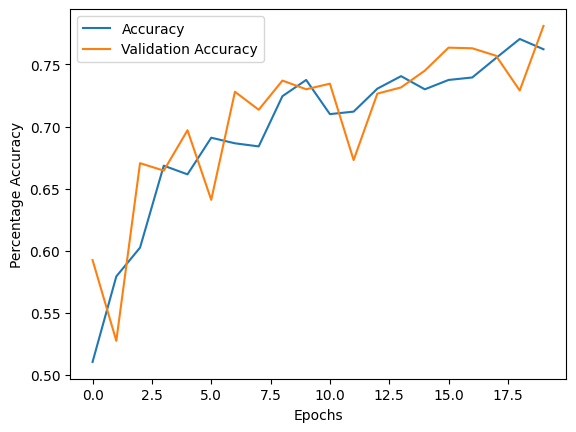

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Percentage Accuracy')
plt.show()

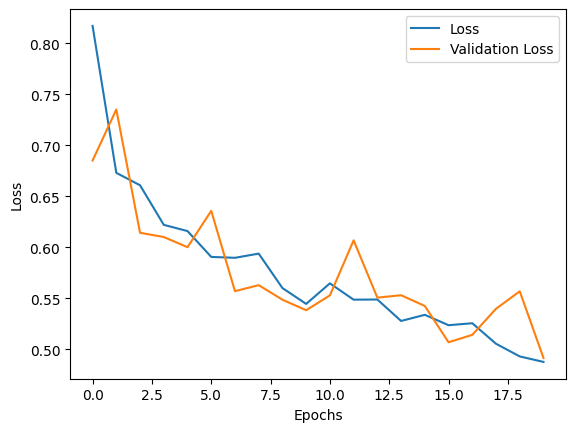

In [ ]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4056.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

In [ ]:
rslt = model1.predict(img_pred)


1/1 [==============================] - 1s 652ms/step


In [ ]:
rslt

array([[0.49705333]], dtype=float32)

In [ ]:
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

Prediction:  Cat


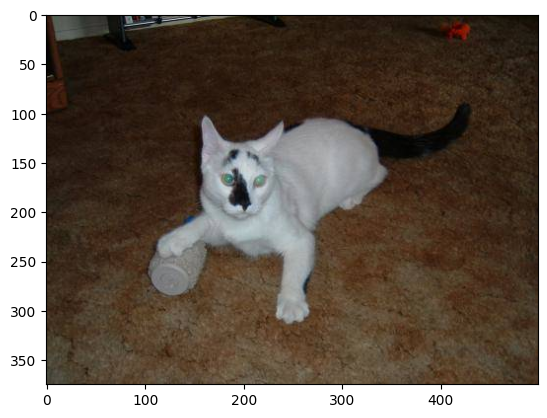

In [ ]:
img=mpimg.imread('/content/test_set/test_set/cats/cat.4056.jpg')
imgplot = plt.imshow(img)
plt.show()

# Transfer Learning

In [ ]:
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model
from keras import applications

In [ ]:
pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")

58889256/58889256 [==============================] - 0s 0us/step


Pre-Trained Layers

In [ ]:
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True

last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

Custom Layers for classification

In [ ]:
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = Dense(1, activation='sigmoid')(x)

model1 = Model(pre_trained_model.input, x)

In [ ]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
training_1 = model1.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)

Epoch 1/20


<ipython-input-60-839da6a1871d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_1 = model1.fit_generator(train_generator,


100/100 [==============================] - 30s 261ms/step - loss: 0.7268 - accuracy: 0.4975 - val_loss: 0.6932 - val_accuracy: 0.4995
Epoch 2/20
100/100 [==============================] - 20s 203ms/step - loss: 0.6931 - accuracy: 0.5080 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 3/20
100/100 [==============================] - 23s 226ms/step - loss: 0.6933 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5010
Epoch 4/20
100/100 [==============================] - 26s 258ms/step - loss: 0.6928 - accuracy: 0.5095 - val_loss: 0.6932 - val_accuracy: 0.5010
Epoch 5/20
100/100 [==============================] - 27s 274ms/step - loss: 0.6936 - accuracy: 0.4925 - val_loss: 0.6932 - val_accuracy: 0.5005
Epoch 6/20
100/100 [==============================] - 25s 249ms/step - loss: 0.6931 - accuracy: 0.5105 - val_loss: 0.6932 - val_accuracy: 0.4995
Epoch 7/20
100/100 [==============================] - 20s 203ms/step - loss: 0.6933 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.4

Hugging Face


In [ ]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests

ModuleNotFoundError: ignored